<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/Copy_of_Copy_of_learning_quadratic_function_by_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn

import numpy as np

import torch.nn.functional as F
import matplotlib.pyplot as plt


Our objective is to learn a quadratic function. 
The target function to learn is
$$f(x) = x^2 + 2x -1.$$


In [0]:

# target function
f = lambda x: x**2 + 2*x - 10

- We use the following network for the forward pass, but the result is not good.

In [0]:
H1 = 5; H2 = 5 #number of hidden layer
model = nn.Sequential(
    nn.Linear(1, H1), 
    nn.Sigmoid(),
    nn.Linear(H1, H2),
    nn.Sigmoid(),
    nn.Linear(H2,2),
    nn.Linear(2,1)
)

In [0]:

#loss function 
criterion = nn.MSELoss()
#optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
#training data
batch_size = 21

x_train = torch.linspace(-5, 5, batch_size).reshape(batch_size,1)
y_train = f(x_train)
#model(x_train)

In [6]:
# Train the model
epoch_n = 10000
print_n = 10
epoch_per_print= np.floor(epoch_n/print_n)

for epoch in range(epoch_n):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)  
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % epoch_per_print == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epoch_n, loss.item()))

Epoch [1000/10000], Loss: 3.6776
Epoch [2000/10000], Loss: 1.1547
Epoch [3000/10000], Loss: 0.7598
Epoch [4000/10000], Loss: 0.6341
Epoch [5000/10000], Loss: 0.5444
Epoch [6000/10000], Loss: 0.4669
Epoch [7000/10000], Loss: 0.3982
Epoch [8000/10000], Loss: 0.3404
Epoch [9000/10000], Loss: 0.2946
Epoch [10000/10000], Loss: 0.2583


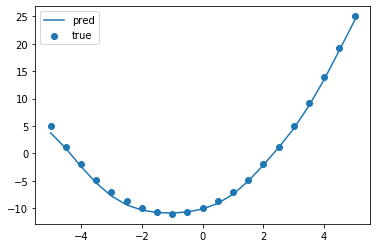

In [7]:
#test

plt.scatter(x_train.detach().numpy(), y_train.detach().numpy(), label='true')

y_pred = model(x_train)
plt.plot(x_train.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()
plt.show()